# Titanic Dataset

Today, in this tutorial we will be answering some basic and beginner questions regarding the titanic dataset.

- It will cover some basic data science comprehension and related topics.

The dataset will be read from the following github repo:
- https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv


Some history of the dataset:
>Some claim that the final hours aboard the RMS Titanic were marked by "class warfare" in which the people with first-class tickets took all the good spots on the lifeboats; others claim that the final hours were characterized by *male chivalry*, in which the men valiantly gave up their positions in the boats and succumbed bravely to the depths of the Atlantic. 

>We have the data on survival rates by class and by sex, so let's figure out whether there is evidence for these scenarios. Access the Titanic data in `titanic_data.csv` and store it in a Pandas DataFrame. The data contains information pertaining to class status (**Pclass**), survival (**Survived**), and gender (**Sex**) of passengers, among other things. Be sure to use the `titanic_data.csv` data set, *not* the `clean_titanic_data` file from the in-class notebook.

**Libraries used for this project**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

**Some Information**: 

Before we begin, let's exam a consider things that we learned about and know about the RMS Titanic.


Consider the two claims: 
- class warfare, and male chivalry. 

Suppose that class warfare occurred in the final hours aboard the Titanic. What patterns might you expect to see in the data? 
>If we suppose that class warfare occurred in the final hours, some patterns that one can expect to see is that memebers from the same class would have a higher survival rate (as long as they beat the other classes). Another pattern that we can see is that there can be low survival rates if they were the ones outed by the other classes.

Suppose that male chivalry was widespread during the final hours instead. What patterns might you then expect to see in the data?
>During the final hours, if male chivalry was widespread, then during those final hours there would be more females who survived.

>If class warfare was to happen, then make chivalry could still be present, or one can be present and the other cannnot. This would make these two events not exclsive. 

**Read in the data to see what it looks like**

In [2]:
URL = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
def read_data(file):
    return pd.read_csv(file)

raw_df = read_data(URL)

raw_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Using Pandas will create a clean data set by removing any rows from the DataFrame that are missing values corresponding to **Survived**, **Pclass**, **Age**, or **Sex**. 

In [3]:
def remove_empty_rows(df, cols):
    return df.dropna(subset = cols)

clean_df = remove_empty_rows(raw_df, ['Survived', 'Pclass', 'Age', 'Sex'])
clean_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Next, we want to compute the fraction of survivors according to class and gender. 

- There are 3 passenger classes and 2 sexes in the data set, so you should report all 6 possible combinations.  

Then, we can answer 3 questions:
* **(i)** Within each passenger class, were men or women more/less/equally likely to survive?
* **(ii)**  Looking at only the male or only the female passengers, how is passenger class related to the category's survival rate?
* **(iii)**  Did men in first class or women in third class have a higher survival rate? 

In [14]:
def survivors(df, class_type: int, sex: str):
    class_ = df.loc[(df['Sex'] == sex) & (df['Survived'] > 0) & (df['Pclass'] == class_type), ]
    return round(len(class_)/len(df.loc[(df['Pclass'] == class_type) & df['Survived'] > 0]), 2)


def survivors_helper():
    class_types = [1, 2, 3]
    sex_ = ['male', 'female']
    for classType in class_types:
        for sex in sex_:
            print(f'Class {classType} {sex} Survivors: {survivors(clean_df, classType, sex) * 100}%')
        print()
            
survivors_helper()

Class 1 male Survivors: 33.0%
Class 1 female Survivors: 67.0%

Class 2 male Survivors: 18.0%
Class 2 female Survivors: 82.0%

Class 3 male Survivors: 45.0%
Class 3 female Survivors: 55.00000000000001%



**What do we notice after computing our survivors based on class and sex?**

>More females are likely to survive.

> The highest chance to survive if you were a male is if you were in class 3, and if you were a female the best class to survive in would be in class 2.

> Women who were in the third class had a much higher chance of surviving. 

**Let's plot some visuals**: 

We will plot a histogram of all the passenger ages!

Let's ponder on the questions:
> How would you characterize the distribution of **AGE**? 

- In other words, What can you tell about the distribution? 
    - Is the data are unimodal, bimodal, multimodal, symmetric, negatively skewed, positively skewed, etc.)

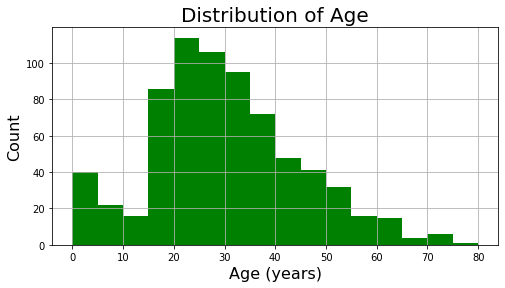

In [17]:
def plot_ages(df):
    my_bins = range(0,85,5)
    fig, ax = plt.subplots(figsize=(8,4))

    df.hist(column="Age", ax=ax, bins=my_bins, facecolor="green")
    ax.set_title("Distribution of Age", fontsize=20)
    ax.set_xlabel("Age (years)", fontsize=16)
    ax.set_ylabel("Count", fontsize=16)
plot_ages(clean_df)

We can see that the distribution of age is bimodal, there are two peaks.
- Graph is positively skewed

**Lastly, let's consider a passangers age to the likelihood of surviving.**: 

To answer this question graphically, we will plot two density histograms on the same set of axes, showing the distribution of the ages of passengers who survived, and the distribution of the ages of passengers who did not. 

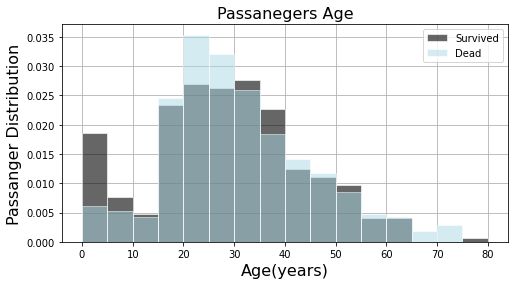

In [22]:
def age_vs_surviving(df):
    my_bins = range(0,85,5)
    fig, ax = plt.subplots(figsize=(8,4))
    df.loc[df["Survived"]==1].hist(
        column="Age", ax=ax, 
        facecolor="black", edgecolor="white", 
        alpha=0.6, bins=my_bins, density=True)
    df.loc[df["Survived"]==0].hist(
        column="Age", ax=ax, 
        facecolor="lightblue", edgecolor="white", 
        alpha=0.5, bins=my_bins, density=True)
    
    ax.set_title("Passanegers Age", fontsize=16)
    ax.set_xlabel("Age(years)", fontsize=16)
    ax.set_ylabel("Passanger Distribution", fontsize=16)
    ax.legend(["Survived", "Dead"]);
    
    ax.set_axisbelow(True)
    
age_vs_surviving(clean_df)

**What's next?**

These were just a few basic questions that we answered using the titanic dataset. We were able to cover general data science and data visualization solutions to these problems.

Going from here:
- Implement Machine Learning Algorithms to predict survivors
- Do some more in depth data science analysis
- In depth Exploratory data analysis